En el apartado "Loading Data" de esta URL:

https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python

Se explica cómo se cargan una serie de datos: 

1. Utiliza esa misma forma para cargar los datos.
2. Limpia los datos si es necesario
3. Dibuja con plotly los que creas necesarios gráficos para entender los datos.
4. Utiliza los métodos de clasificación vistos hasta ahora para clasificar el target de los datos, ¿cuál da mejores resultados? 
5. Intenta superarte en el score cambiando las features de los algoritmos.

### 1. Utiliza esa misma forma para cargar los datos.

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# Gráfica simple real vs predicha
from sklearn.linear_model import LinearRegression
# Regresion lineal
from sklearn.ensemble import RandomForestRegressor
# Para knn (Clasificación):
from sklearn.datasets import make_moons
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
# logistic Regresion
from sklearn.linear_model import LogisticRegression
# svm
from sklearn import svm
from sklearn.svm import SVR
from sklearn.svm import SVC


Cargando datos
Primero carguemos el conjunto de datos requerido que usará.

In [2]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
cancer = datasets.load_breast_cancer(as_frame=True)
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

Explorando datos

In [4]:
#Una vez que haya cargado el conjunto de datos, es posible que desee saber un poco más sobre él. Puede comprobar los nombres de las funciones y los objetivos.
# print the names of the 13 features
print("Features: ", cancer.feature_names)

# print the label type of cancer('malignant' 'benign')
print("Labels: ", cancer.target_names)

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:  ['malignant' 'benign']


In [5]:
#Exploremos un poco más. También puede verificar la forma del conjunto de datos usando shape.
# print data(feature)shape
cancer.data.shape

(569, 30)

In [7]:
cancer.target.shape

(569,)

In [8]:
cancer.feature_names.shape

(30,)

In [9]:
# Revisemos los 5 registros principales del conjunto de características.
# print the cancer data features (top 5 records)
print(cancer.data[0:5])

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0              

In [10]:
#Echemos un vistazo al conjunto de objetivos.
# print the cancer labels (0:malignant, 1:benign)
print(cancer.target)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64


### 2. Limpia los datos si es necesario

In [36]:
type(cancer)

sklearn.utils.Bunch

Generamos un dataframe para ver los datos de una manera más intuitiva

In [3]:
df = pd.DataFrame(data= np.c_[cancer['data'], cancer['target']],
                     columns=list(cancer['feature_names']) + ['target'])
df

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                   0.07871  ...          17.33           184.60      2019.0   
1                   0.05667  ...          23.41           158.80      1956.0   
2                   0.05999  ...          25.53           152.50      1709.0   
3                   0.09744  ...          26.50            98.87       567.7   
4                   0.05883  ...          16.67           152.20      1575.0   
..                      ...  ...            ...              ...         ...   
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension  target  
0                  0.2654          0.4601                  0.11890     0.0  
1                  0.1860          0.2750                  0.08902     0.0  
2                  0.2430          0.3613                  0.08758     0.0  
3                  0.2575          0.6638                  0.17300     0.0  
4                  0.1625          0.2364                  0.076

### 3. Dibuja con plotly los que creas necesarios gráficos para entender los datos

In [82]:
# Definimos X e y
X = df.drop(["target"],1)
y = df['target']

In [18]:
# Matriz de correlación:
df.corr()

mean radius  mean texture  mean perimeter  mean area  \
mean radius                 1.000000      0.323782        0.997855   0.987357   
mean texture                0.323782      1.000000        0.329533   0.321086   
mean perimeter              0.997855      0.329533        1.000000   0.986507   
mean area                   0.987357      0.321086        0.986507   1.000000   
mean smoothness             0.170581     -0.023389        0.207278   0.177028   
mean compactness            0.506124      0.236702        0.556936   0.498502   
mean concavity              0.676764      0.302418        0.716136   0.685983   
mean concave points         0.822529      0.293464        0.850977   0.823269   
mean symmetry               0.147741      0.071401        0.183027   0.151293   
mean fractal dimension     -0.311631     -0.076437       -0.261477  -0.283110   
radius error                0.679090      0.275869        0.691765   0.732562   
texture error              -0.097317      0.386358       -0.086761  -0.066280   
perimeter error             0.674172      0.281673        0.693135   0.726628   
area error                  0.735864      0.259845        0.744983   0.800086   
smoothness error           -0.222600      0.006614       -0.202694  -0.166777   
compactness error           0.206000      0.191975        0.250744   0.212583   
concavity error             0.194204      0.143293        0.228082   0.207660   
concave points error        0.376169      0.163851        0.407217   0.372320   
symmetry error             -0.104321      0.009127       -0.081629  -0.072497   
fractal dimension error    -0.042641      0.054458       -0.005523  -0.019887   
worst radius                0.969539      0.352573        0.969476   0.962746   
worst texture               0.297008      0.912045        0.303038   0.287489   
worst perimeter             0.965137      0.358040        0.970387   0.959120   
worst area                  0.941082      0.343546        0.941550   0.959213   
worst smoothness            0.119616      0.077503        0.150549   0.123523   
worst compactness           0.413463      0.277830        0.455774   0.390410   
worst concavity             0.526911      0.301025        0.563879   0.512606   
worst concave points        0.744214      0.295316        0.771241   0.722017   
worst symmetry              0.163953      0.105008        0.189115   0.143570   
worst fractal dimension     0.007066      0.119205        0.051019   0.003738   
target                     -0.730029     -0.415185       -0.742636  -0.708984   

                         mean smoothness  mean compactness  mean concavity  \
mean radius                     0.170581          0.506124        0.676764   
mean texture                   -0.023389          0.236702        0.302418   
mean perimeter                  0.207278          0.556936        0.716136   
mean area                       0.177028          0.498502        0.685983   
mean smoothness                 1.000000          0.659123        0.521984   
mean compactness                0.659123          1.000000        0.883121   
mean concavity                  0.521984          0.883121        1.000000   
mean concave points             0.553695          0.831135        0.921391   
mean symmetry                   0.557775          0.602641        0.500667   
mean fractal dimension          0.584792          0.565369        0.336783   
radius error                    0.301467          0.497473        0.631925   
texture error                   0.068406          0.046205        0.076218   
perimeter error                 0.296092          0.548905        0.660391   
area error                      0.246552          0.455653        0.617427   
smoothness error                0.332375          0.135299        0.098564   
compactness error               0.318943          0.738722        0.670279   
concavity error                 0.248396          0.570517        0.691270   
concave points error        

<AxesSubplot:>

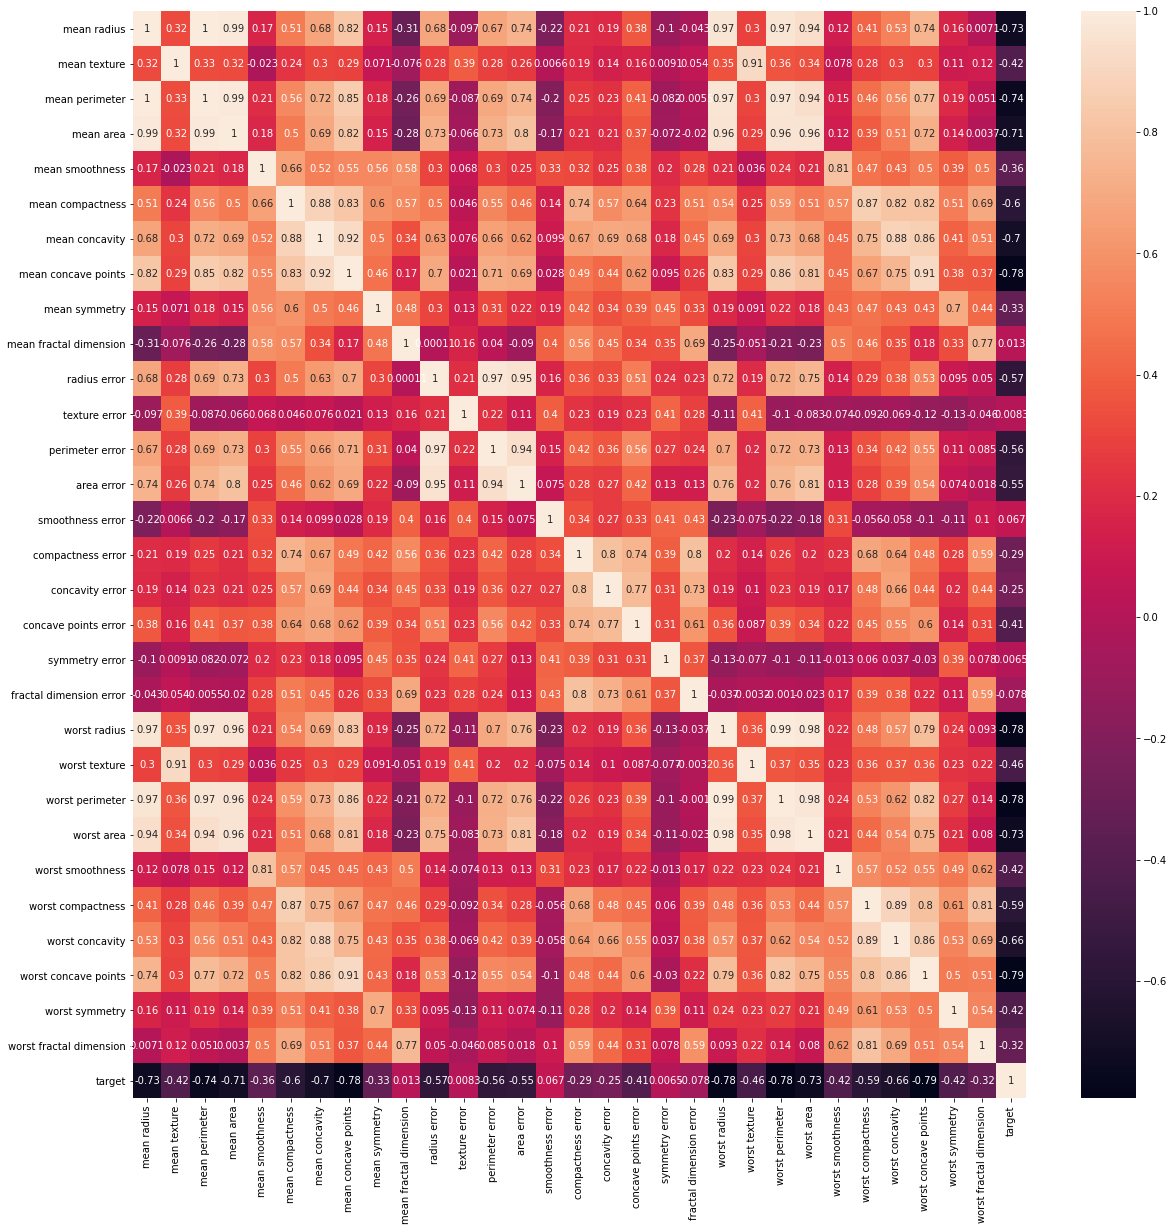

In [16]:
# Visualizamos la matriz de correlación
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot=True)

In [17]:

# Sería una buena forma de representar mis datos sino fuera porque es muy amplio el conjunto de datos
plt.figure(figsize = (20,20))
fig = px.scatter_matrix(df)
fig.show()

<Figure size 1440x1440 with 0 Axes>

In [42]:
# Gráfica simple real vs predicha

#X = df.drop(["target"],1)
#y = df['target']

# Condition the model on sepal width and length, predict the petal width
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

fig = px.scatter(x=y, y=y_pred, labels={'x': 'Real', 'y': 'Prediction'})
fig.add_shape(
    type="line", line=dict(dash='dash'),
    x0=y.min(), y0=y.min(),
    x1=y.max(), y1=y.max()
)
fig.show()

In [43]:
# Gráfica simple real vs predicha

#X = df.drop(["target"],1)
#y = df['target']

# Condition the model on sepal width and length, predict the petal width
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

fig = px.scatter(x=y, y=y_pred, labels={'x': 'Real', 'y': 'Predecido'})
fig.add_shape(
    type="line", line=dict(dash='dash'),
    x0=y.min(), y0=y.min(),
    x1=y.max(), y1=y.max()
)
fig.show()

### No entiendo muy bien porqué sale este tipo de gráfica !!!!!!

In [51]:
# Regresion lineal

#X = df.drop(["target"],1)
#y = df['target'].values

model = RandomForestRegressor()
model.fit(X, y)

x_range = np.linspace(X.min(), X.max(), 100)
y_range = model.predict(x_range)


fig.add_traces(go.Scatter(x=x_range, y=y_range, name='Regression Fit'))
fig.show()

In [46]:
#Generalización de modelos sobre datos invisibles:

X = df.drop(["target"],1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

x_range = np.linspace(X.min(), X.max(), 100)
y_range = model.predict(x_range)


fig = go.Figure([
    go.Scatter(x=X_train.squeeze(), y=y_train, name='train', mode='markers'),
    go.Scatter(x=X_test.squeeze(), y=y_test, name='test', mode='markers'),
    go.Scatter(x=x_range, y=y_range, name='prediction')
])
fig.show()

Este modelo no me aclara nada 

In [57]:
# Para knn (Clasificación):

# Load and split data
X = df.drop(["target"],1)
y = df['target']
#X, y = make_moons(noise=0.3, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(
    X, y.astype(str), test_size=0.25, random_state=0)

trace_specs = [
    [X_train, y_train, '0', 'Train', 'square'],
    [X_train, y_train, '1', 'Train', 'circle'],
    [X_test, y_test, '0', 'Test', 'lines+markers'],
    [X_test, y_test, '1', 'Test', 'circle-dot']
]

fig.update_traces(
    marker_size=12, marker_line_width=1.5,
    marker_color="lightyellow"
)
fig.show()

In [77]:
# Comparación de diferentes parámetros de modelos kNN

#X = df.drop(["target"],1)
#y = df['target']

# Model #1
knn_dist = KNeighborsRegressor(10, weights='distance')
knn_dist.fit(X, y)
y_dist = knn_dist.predict(x_range)

# Model #2
knn_uni = KNeighborsRegressor(10, weights='uniform')
knn_uni.fit(X, y)
y_uni = knn_uni.predict(x_range)

fig = px.scatter(y_dist, x='mean radius', y='target', color='sex', opacity=0.65)
fig.add_traces(go.Scatter(x=x_range, y=y_uni, name='Weights: Uniform'))
fig.add_traces(go.Scatter(x=x_range, y=y_dist, name='Weights: Distance'))
fig.show()

### Me resulta complejo dar valores X e y para mostrar las gráficas

### 4. Utiliza los métodos de clasificación vistos hasta ahora para clasificar el target de los datos, ¿cuál da mejores resultados?

División de datos
Para comprender el rendimiento del modelo, dividir el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba es una buena estrategia.

Divida el conjunto de datos utilizando la función train_test_split(). debe pasar 3 parámetros de características, objetivo y tamaño de test_set. Además, puede usar random_state para seleccionar registros al azar.

In [ ]:
Métodos utilizados:
* Regresion lineal   
* Logistic Regresion
* Knn
* SVM

# random_estate:
Es un parámetro utilizado en Split que controla el generador de números aleatorios:
Hay tres tipos:
    * Ninguno predeterminado--> numpy.random
    * un entero que es una semilla suele ser de 0 a 42
    * Una instancia --> numpy.random.random_estate
Utilizaré una semilla

In [4]:
# Defino X e y para poder entrenar mis modelos:
X = df.drop(["target"],1).values.astype(float)
y = df['target'].values.astype(float)

In [115]:
X.shape

(569, 30)

(569,)

In [5]:
seed= 2
X_train,X_test, y_train,y_test= train_test_split(X, y, test_size=0.20)

In [11]:
X_train.shape

(455, 30)

In [12]:
y_train.shape

(455,)

In [43]:
scores_models = []
model_name = ["LinearRegression","LogisticRegression","Knn_1", "Knn_2","svm.SVR", "svm.SVC"]

In [44]:
# REGRESION LINEAL:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
score = model.score(X_train,y_train)
print("Predición del modelo: ", y_pred.shape)
print("Score Regresion lineal: ", score)
scores1 = scores_models.append(score)

Predición del modelo:  (455,)
Score Regresion lineal:  0.77715988379476


In [45]:
# LOGISTIC REGRESION
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
score = model.score(X_train,y_train)
print("Predición del modelo: ", y_pred.shape)
print("Score Logistic Regresion: ", score)
scores2 = scores_models.append(score)

Predición del modelo:  (455,)
Score Logistic Regresion:  0.9582417582417583


In [46]:
# KNN
# Model #1
model = KNeighborsRegressor(10, weights='distance')
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
print("Predición del modelo: ", y_pred.shape)
print("Score KNN modelo1: ", score)
scores3 = scores_models.append(score)
# Model #2
model2 = KNeighborsRegressor(10, weights='uniform')
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_train)
print("Predición del modelo: ", y_pred2.shape)
print("Score KNN modelo 2: ", score)
scores4 = scores_models.append(score)

Predición del modelo:  (455,)
Score KNN modelo1:  0.9582417582417583
Predición del modelo:  (455,)
Score KNN modelo 2:  0.9582417582417583


In [47]:
# SVM

# SVM -- SVR (Regresión)
clf = svm.SVR(kernel='rbf', gamma="auto")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_train)
print("Predición del modelo: ", y_pred2.shape)
print("Score SVM -- SVR: ", score)
scores5 = scores_models.append(score)
# SVM -- SVC (Clasificación)
clf = svm.SVC(kernel='rbf', gamma="auto")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_train)
print("Predición del modelo: ", y_pred2.shape)
print("Score SVM -- SVC: ", score)
scores6 = scores_models.append(score)

Predición del modelo:  (455,)
Score SVM -- SVR:  0.9582417582417583
Predición del modelo:  (455,)
Score SVM -- SVC:  0.9582417582417583


In [48]:
df_score = pd.DataFrame(scores_models, index=model_name)
df_score.rename(columns={0: "score"}, inplace=True)
df_score

score
LinearRegression    0.777160
LogisticRegression  0.958242
Knn_1               0.958242
Knn_2               0.958242
svm.SVR             0.958242
svm.SVC             0.958242

In [ ]:
Comprobamos que linearRegrission es el peor modelo de todos. El resto tienen el mismo score, no sé si es casualidad o error.

### 5. Intenta superarte en el score cambiando las features de los algoritmos.

In [10]:

# REGRESION LINEAL:
model = LinearRegression(n_jobs=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
score = model.score(X_train,y_train)
print("Predición del modelo: ", y_pred.shape)
print("Score Regresion lineal: ", score)


Predición del modelo:  (455,)
Score Regresion lineal:  0.7793686290891254


In [ ]:
Cambio sólo los parámetros de regresión lineal porque es el que más bajo me ha salido, y consigo una leve mejoría. Asi que no sería un buen modelo.